# German Electricity Data :electric_plug:

- Data Source: [SMARD Web Portal](https://www.smard.de/) 
- Task: forecasting \(using the past to predict the future\)
- Language: [julia](https://julialang.org)

## First steps:

- load the data \(with appropriate column types\) :heavy_check_mark: 
- split the data into train/val/test sets
- plot the time series \(at different temporal resolution\)
- calculate the mean production per month
- is there a seasonal pattern \(what kinds of seasonalities\)
- make a prediction for the validation set
- evaluate the quality of the prediction



In [3]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [33]:
theme_set(theme_light())

In [4]:
set.seed(42)
"Felix Robin Mike Markus" %>%  str_split(" ") %>% unlist %>% sample %>% str_c(collapse=" → ")

[1] "Felix → Markus → Mike → Robin"

## 1. Data loading

- load the hourly data from the file `Realisierte_Erzeugung_201501010000_202305301300_Stunde.csv` as a table into R :heavy_check_mark:
- make sure, that data is interpreted and typed correctly :heavy_check_mark:
- clean header names :heavy_check_mark:
- create column `Time` containing the combined info from `Datum` and `Anfang`



In [5]:
data <- read_csv2(
    "../data_dojo_22/Realisierte_Erzeugung_201501010000_202305301300_Stunde.csv",
    col_types=cols(`Datum` = col_date("%d.%m.%Y")),
    na="-"
)

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.



In [6]:
colnames(data) <- colnames(data) %>% str_remove(" \\[.*") %>% str_replace(" ","_")

In [7]:
data

Datum,Anfang,Ende,Biomasse,Wasserkraft,Wind_Offshore,Wind_Onshore,Photovoltaik,Sonstige_Erneuerbare,Kernenergie,Braunkohle,Steinkohle,Erdgas,Pumpspeicher,Sonstige_Konventionelle
<date>,<time>,<time>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2015-01-01,00:00:00,01:00:00,4024.25,1158.25,516.50,8128.00,0.00,133.00,10710.50,15687.25,3219.75,1226.25,1525.75,4909.25
2015-01-01,01:00:00,02:00:00,3982.75,1188.00,516.25,8297.50,0.00,122.50,11086.25,15321.75,2351.25,870.75,1079.25,4932.75
2015-01-01,02:00:00,03:00:00,4019.50,1139.25,514.00,8540.00,0.00,93.00,11026.25,14817.50,2227.00,809.50,787.00,5041.75
2015-01-01,03:00:00,04:00:00,4040.75,1122.50,517.75,8552.00,0.00,86.50,11027.75,14075.00,2339.75,821.00,287.75,5084.00
2015-01-01,04:00:00,05:00:00,4037.75,1112.00,519.75,8643.50,0.00,86.50,10962.25,14115.00,2461.50,831.25,346.75,5070.75
2015-01-01,05:00:00,06:00:00,4028.25,1107.75,520.00,8711.75,0.00,86.75,10696.00,13474.25,2217.75,851.00,765.50,5096.75
2015-01-01,06:00:00,07:00:00,4013.25,1111.75,521.50,9167.25,0.00,87.00,10299.50,12403.75,2373.25,868.25,414.50,5153.00
2015-01-01,07:00:00,08:00:00,4012.75,1113.75,520.25,9811.00,0.00,87.00,10035.25,12062.50,2491.00,876.00,582.50,5161.00
2015-01-01,08:00:00,09:00:00,3999.75,1107.50,525.25,9683.00,53.00,87.00,10245.75,12405.00,2530.25,888.25,750.50,5393.50


### Todo 2<sup>nd</sup> session
- Create `Time` column
- Split into training/validation/test set
- Plot the training set with hourly resolution
- Aggregate by day/month
- Plot aggregated data

<details>
    <summary>Bonus task</summary>
    <ul>
        <li>did you observe something peculiar with dates and times?</li>
        <li>look at the hourly data of 2017-10-29 for an example</li>
        <li>what happened there?</li>
        <li>are there more days with a similar "problem"?</li>
        <li>is this a problem?</li>
        <li>how can we solve this?</li>
    </ul>
</details>

In [47]:
data <- data %>%
    mutate(Time=Datum+hours(hour(Anfang)))

In [48]:
data

Datum,Anfang,Ende,Biomasse,Wasserkraft,Wind_Offshore,Wind_Onshore,Photovoltaik,Sonstige_Erneuerbare,Kernenergie,Braunkohle,Steinkohle,Erdgas,Pumpspeicher,Sonstige_Konventionelle,Time
<date>,<time>,<time>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2015-01-01,00:00:00,01:00:00,4024.25,1158.25,516.50,8128.00,0.00,133.00,10710.50,15687.25,3219.75,1226.25,1525.75,4909.25,2015-01-01 00:00:00
2015-01-01,01:00:00,02:00:00,3982.75,1188.00,516.25,8297.50,0.00,122.50,11086.25,15321.75,2351.25,870.75,1079.25,4932.75,2015-01-01 01:00:00
2015-01-01,02:00:00,03:00:00,4019.50,1139.25,514.00,8540.00,0.00,93.00,11026.25,14817.50,2227.00,809.50,787.00,5041.75,2015-01-01 02:00:00
2015-01-01,03:00:00,04:00:00,4040.75,1122.50,517.75,8552.00,0.00,86.50,11027.75,14075.00,2339.75,821.00,287.75,5084.00,2015-01-01 03:00:00
2015-01-01,04:00:00,05:00:00,4037.75,1112.00,519.75,8643.50,0.00,86.50,10962.25,14115.00,2461.50,831.25,346.75,5070.75,2015-01-01 04:00:00
2015-01-01,05:00:00,06:00:00,4028.25,1107.75,520.00,8711.75,0.00,86.75,10696.00,13474.25,2217.75,851.00,765.50,5096.75,2015-01-01 05:00:00
2015-01-01,06:00:00,07:00:00,4013.25,1111.75,521.50,9167.25,0.00,87.00,10299.50,12403.75,2373.25,868.25,414.50,5153.00,2015-01-01 06:00:00
2015-01-01,07:00:00,08:00:00,4012.75,1113.75,520.25,9811.00,0.00,87.00,10035.25,12062.50,2491.00,876.00,582.50,5161.00,2015-01-01 07:00:00
2015-01-01,08:00:00,09:00:00,3999.75,1107.50,525.25,9683.00,53.00,87.00,10245.75,12405.00,2530.25,888.25,750.50,5393.50,2015-01-01 08:00:00


In [9]:
data %>% count(year(Time))

year(Time),n
<dbl>,<int>
2015,8760
2016,8784
2017,8760
2018,8760
2019,8760
2020,8784
2021,8760
2022,8760
2023,3588


In [10]:
train <- data %>% filter(year(Time)<2021)

In [11]:
val <- data %>% filter(year(Time)==2021)

In [12]:
test <- data %>% filter(year(Time)>2021)

In [13]:
dim(train)

[1] 52608    16

In [37]:
options(repr.plot.res = 200)

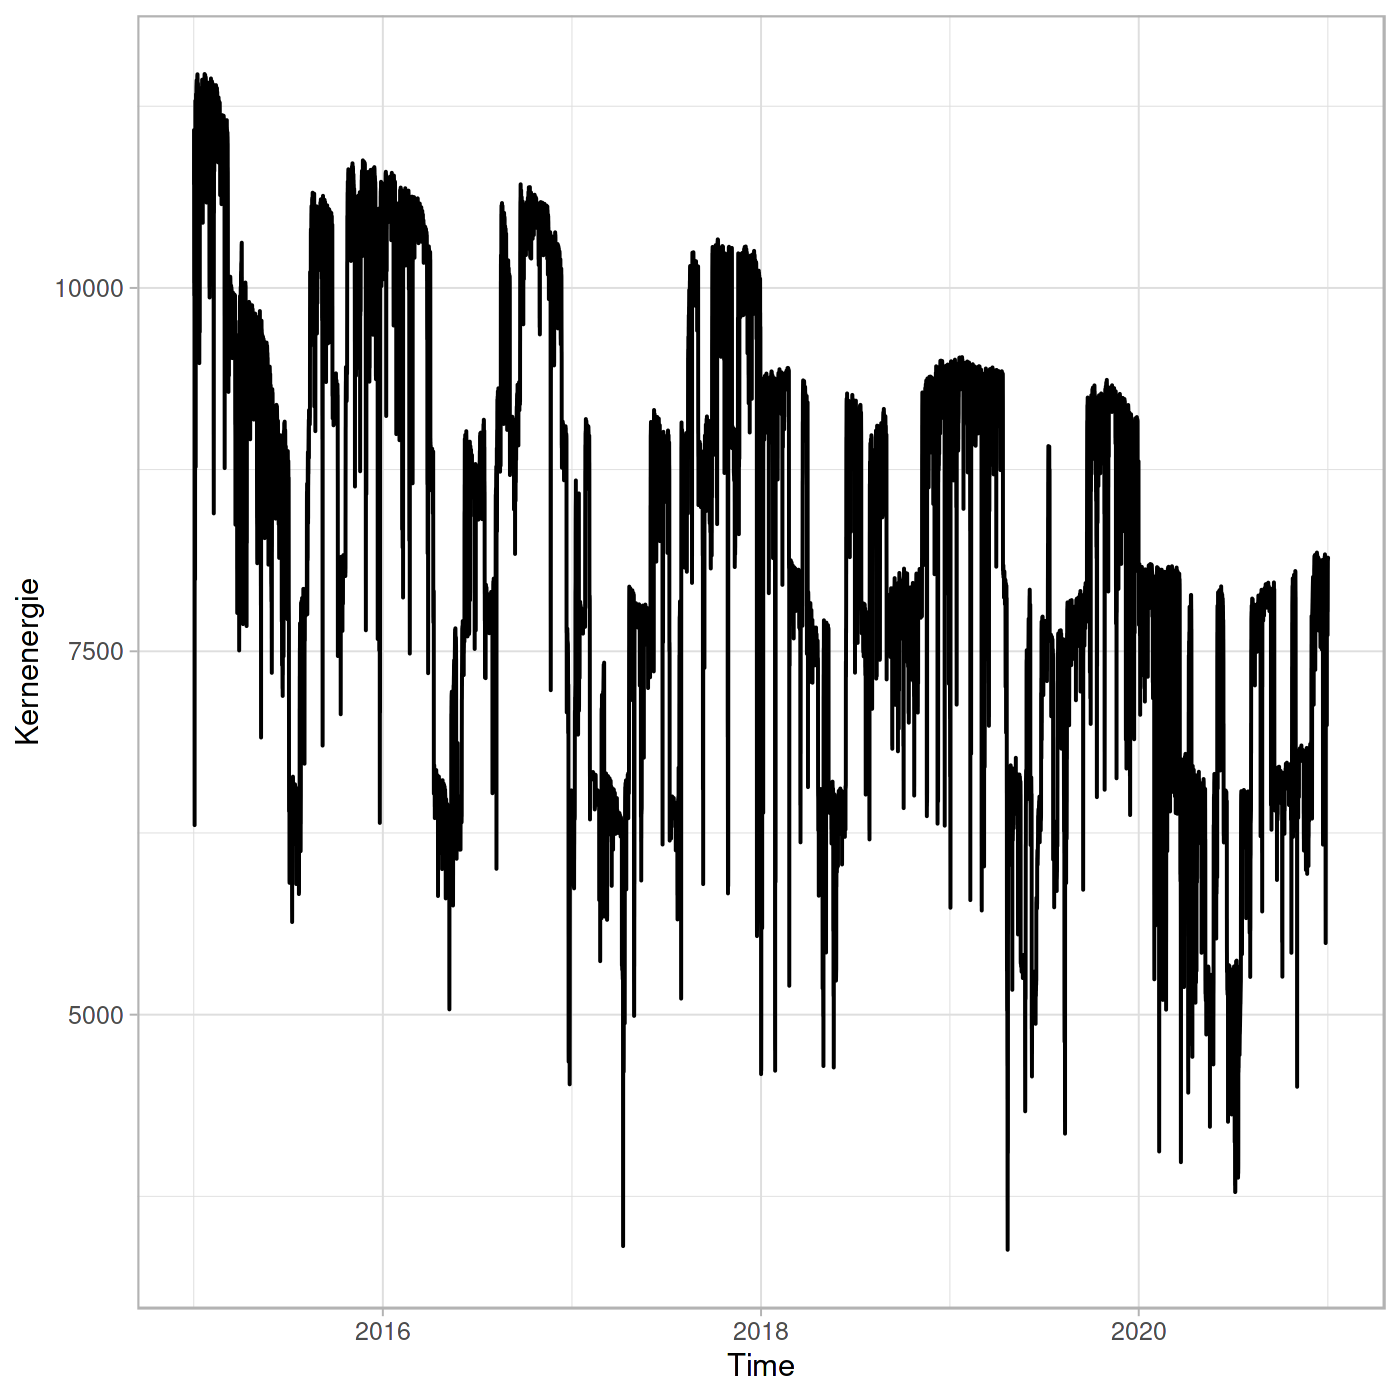

In [38]:
train %>% ggplot(aes(Time, Kernenergie)) + geom_line()

In [16]:
tidydf <- train %>%
    pivot_longer(names_to='Type', values_to='MWh', Biomasse:Sonstige_Konventionelle) %>%
    select(-c(Datum, Anfang, Ende))

In [49]:
tidydf

Time,Type,MWh
<dttm>,<chr>,<dbl>
2015-01-01 00:00:00,Biomasse,4024.25
2015-01-01 00:00:00,Wasserkraft,1158.25
2015-01-01 00:00:00,Wind_Offshore,516.50
2015-01-01 00:00:00,Wind_Onshore,8128.00
2015-01-01 00:00:00,Photovoltaik,0.00
2015-01-01 00:00:00,Sonstige_Erneuerbare,133.00
2015-01-01 00:00:00,Kernenergie,10710.50
2015-01-01 00:00:00,Braunkohle,15687.25
2015-01-01 00:00:00,Steinkohle,3219.75


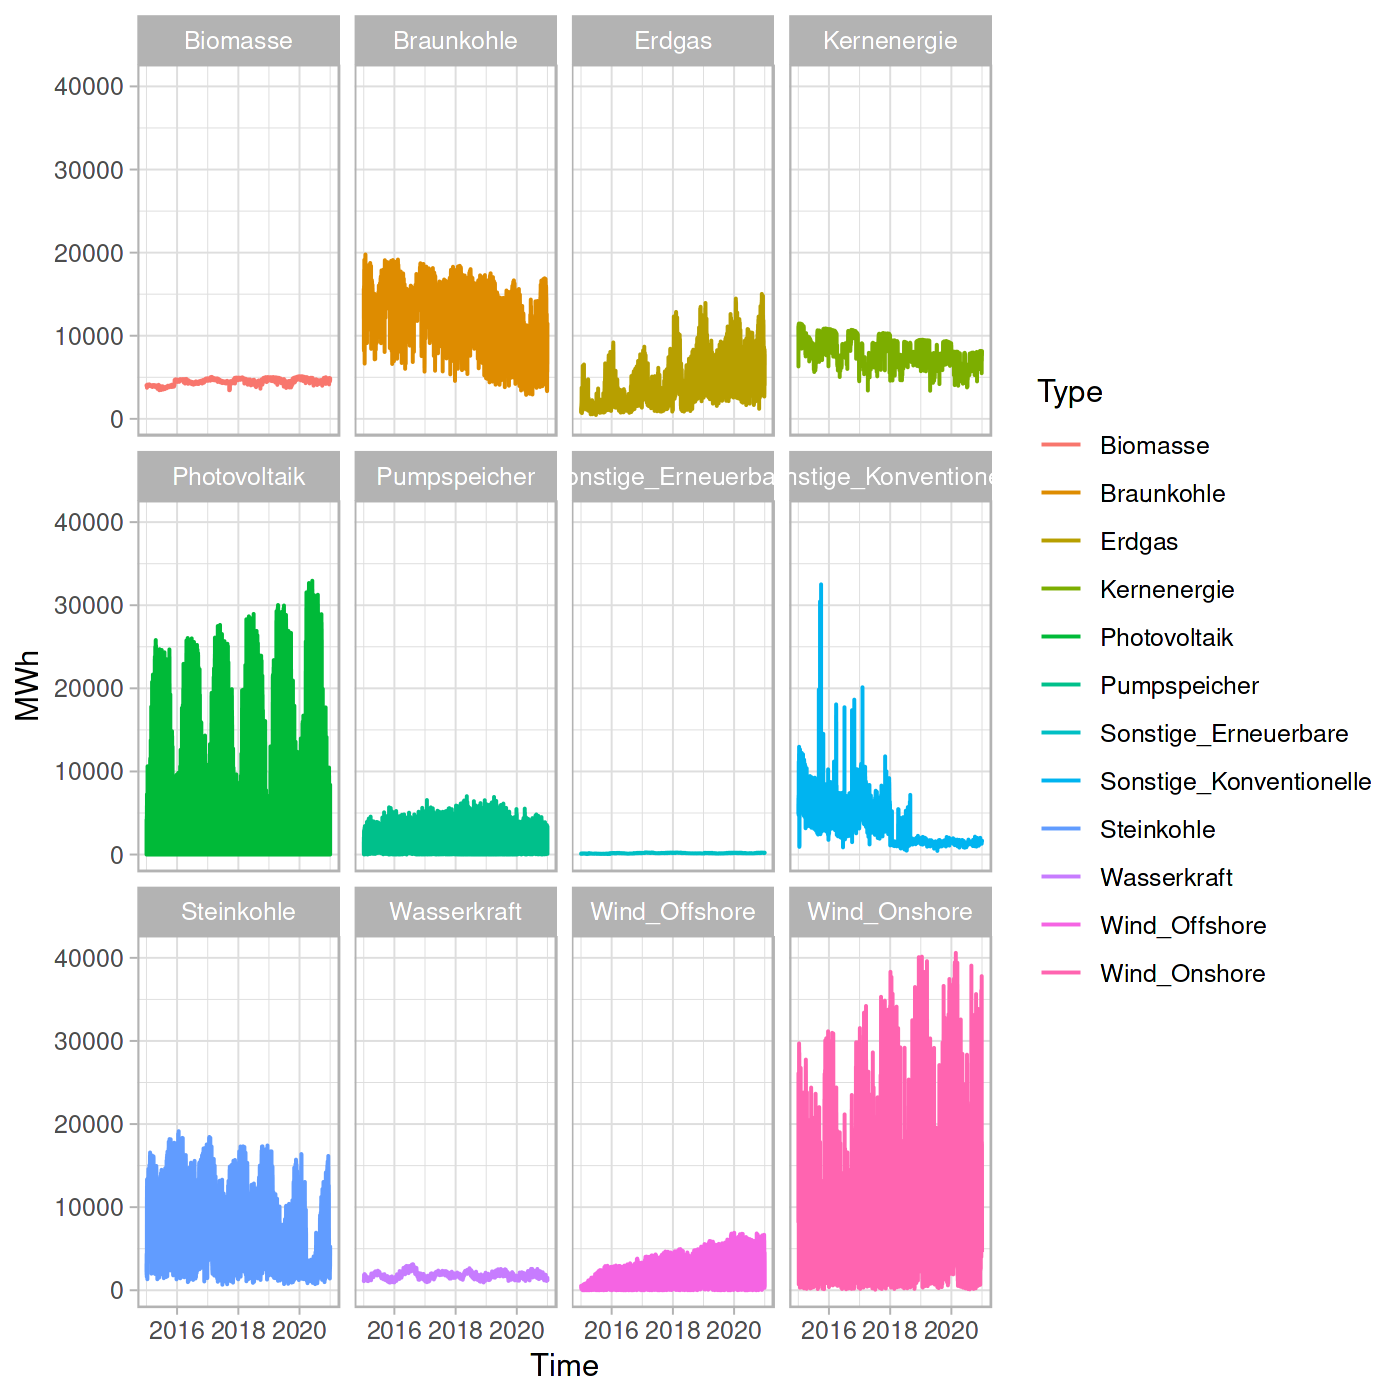

In [39]:
ggplot(tidydf)+
    geom_line(aes(Time, MWh, color = Type)) + facet_wrap(Type~.)

`summarise()` has grouped output by 'date'. You can override using the
`.groups` argument.


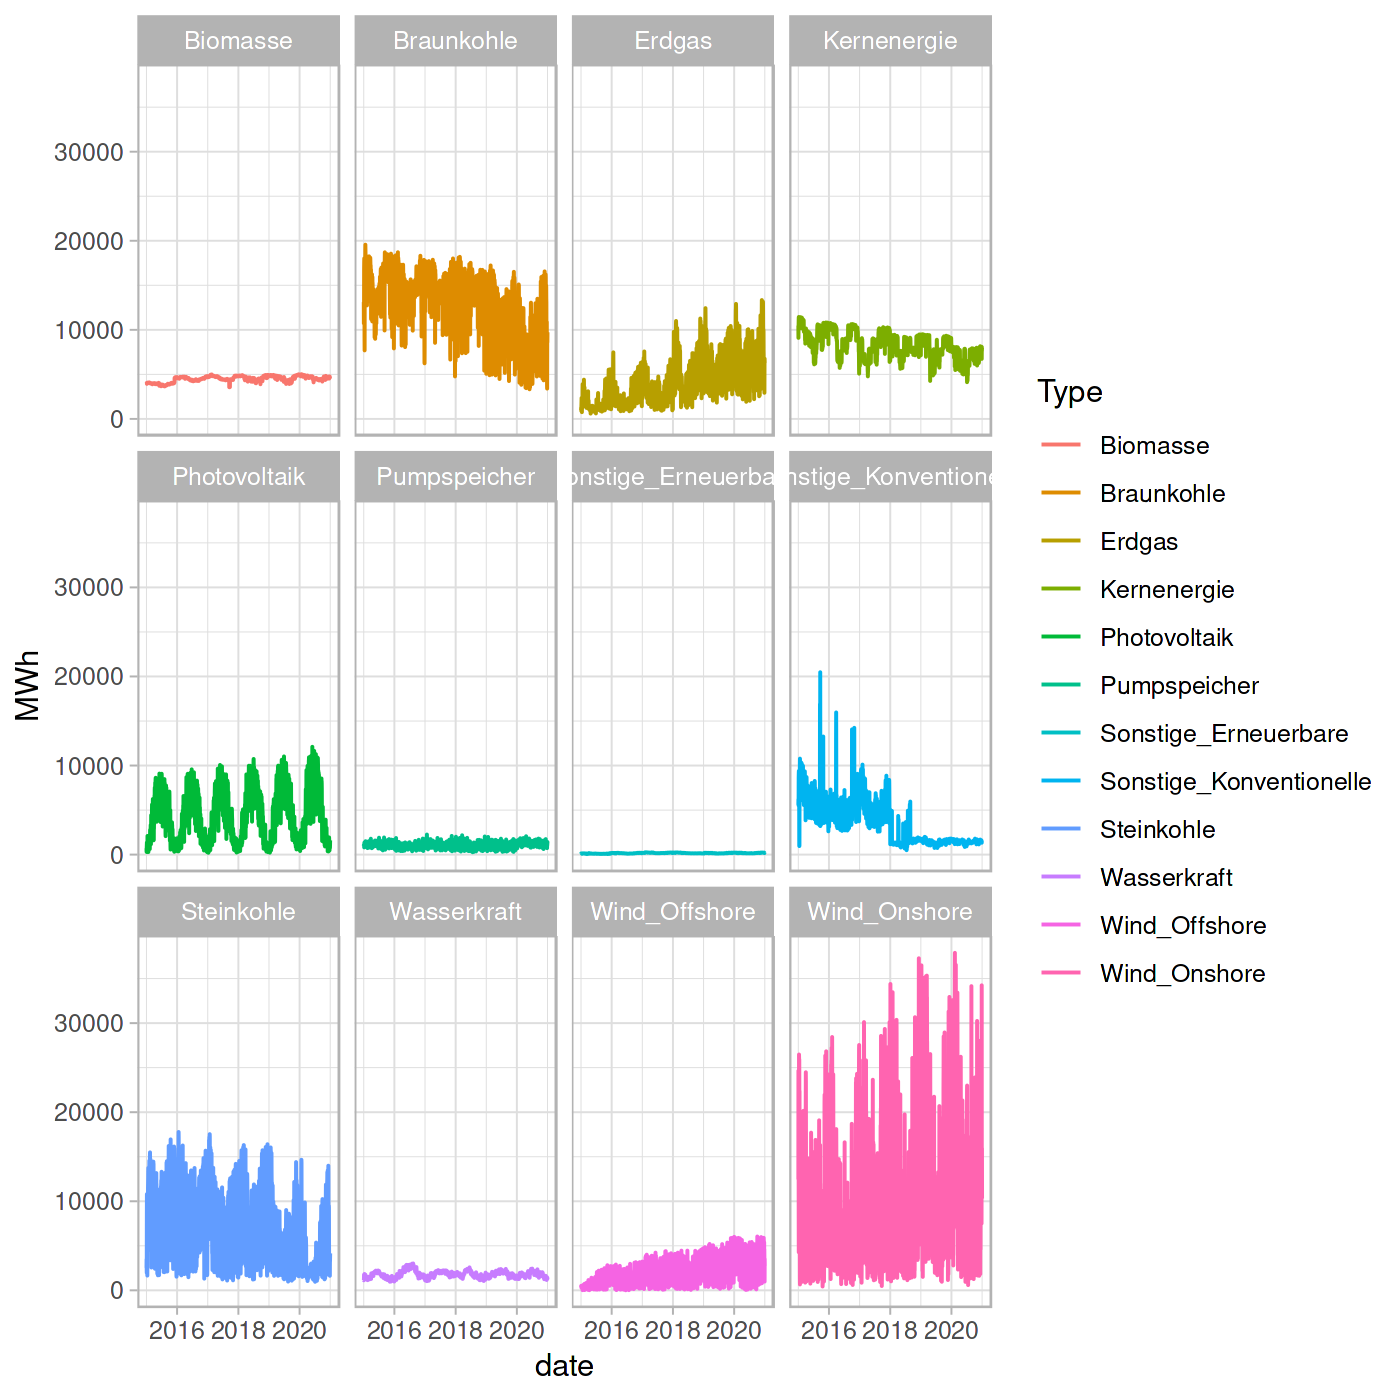

In [40]:
tidydf %>% 
            group_by(date = floor_date(Time, unit = "day"),Type) %>% 
            summarize(MWh = mean(MWh)) %>%
            ggplot() + geom_line(aes(date,MWh,color = Type)) + facet_wrap(~Type)

`summarise()` has grouped output by 'date'. You can override using the
`.groups` argument.


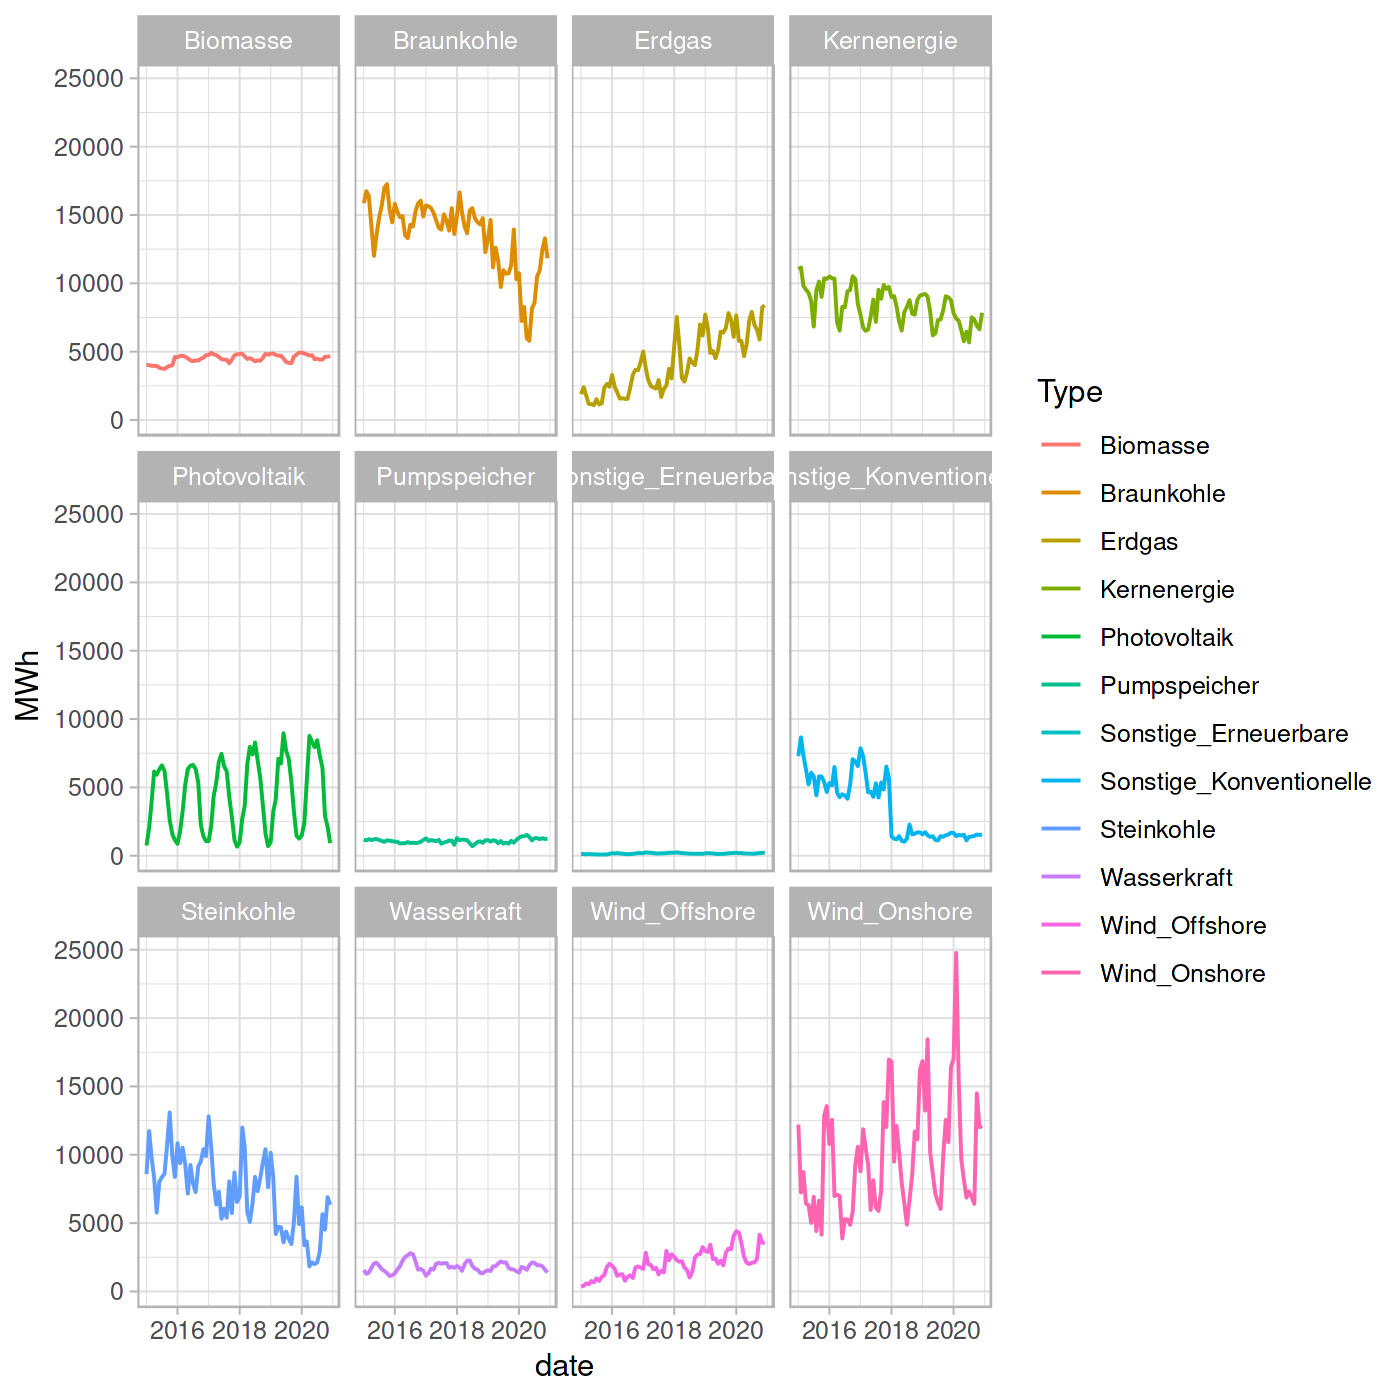

In [41]:
tidydf %>% 
            group_by(date = floor_date(Time, unit = "month"),Type) %>%
            summarize(MWh = mean(MWh)) %>%
            ggplot() + geom_line(aes(date,MWh,color = Type)) + facet_wrap(~Type)
            #identity

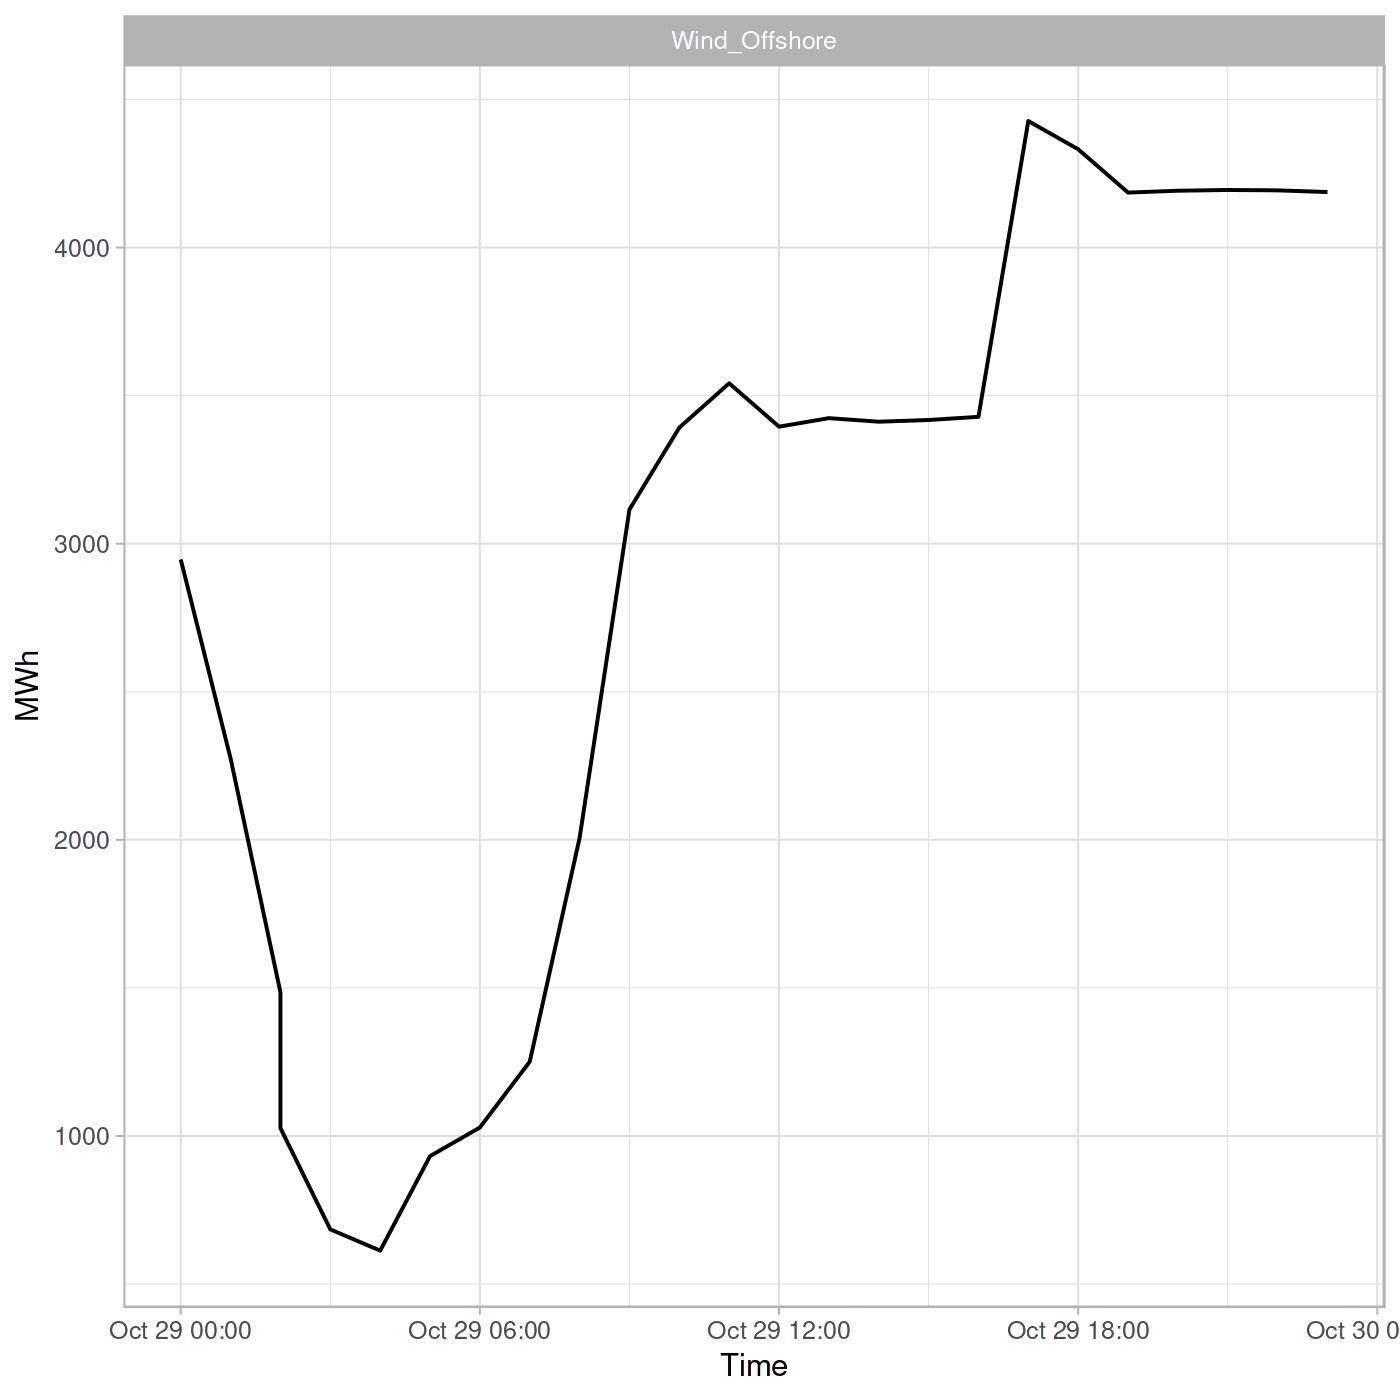

In [46]:
tidydf %>% filter(day(Time)==29, month(Time)==10, year(Time)==2017, Type == "Wind_Offshore") %>% ggplot(aes(Time, MWh)) + geom_line() + facet_wrap(~Type, scale = 'free')